In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import scipy.stats as stats

In [2]:
data_eth = pd.read_csv(r'C:\Users\dinhn\Downloads\Ethereum_Historical_Data.csv')
data_eth

,Date,Price,Open,High,Low,Vol.,Change
0,2019-03-01,135.72,135.47,138.06,128.46,9.73,0.00
1,2019-03-02,132.76,135.72,136.36,130.74,11.29,-0.02
2,2019-03-03,131.01,132.77,168.42,129.05,10.64,-0.01
3,2019-03-04,125.97,131.02,131.57,123.25,14.11,-0.04
4,2019-03-05,136.82,125.97,141.11,125.44,16.74,0.09
...,...,...,...,...,...,...,...
1915,2024-05-28,3845.56,,3929.21,3775.08,436.24,-0.01
1916,2024-05-29,3769.57,3845.56,3886.44,3745.72,353.25,-0.02
1917,2024-05-30,3747.55,3767.22,3824.94,3703.74,293.81,-0.01
1918,2024-05-31,3762.66,3747.89,3844.96,3724.57,294.56,0.00


In [3]:

# Convert the 'Date' column to datetime format
data_eth['Date'] = pd.to_datetime(data_eth['Date'])
data_eth=data_eth.set_index('Date')

# Set the 'Date' column as the index value
data_eth.drop(['Open'], axis=1, inplace=True)
data_eth.drop('High', axis=1, inplace=True)
data_eth.drop('Low', axis=1, inplace=True)
data_eth.drop('Vol.', axis=1, inplace=True)
data_eth.drop('Change', axis=1, inplace=True)
data_eth.head


<bound method NDFrame.head of               Price
Date               
2019-03-01   135.72
2019-03-02   132.76
2019-03-03   131.01
2019-03-04   125.97
2019-03-05   136.82
...             ...
2024-05-28  3845.56
2024-05-29  3769.57
2024-05-30  3747.55
2024-05-31  3762.66
2024-06-01  3815.95

[1920 rows x 1 columns]>

<Figure size 2000x800 with 0 Axes>

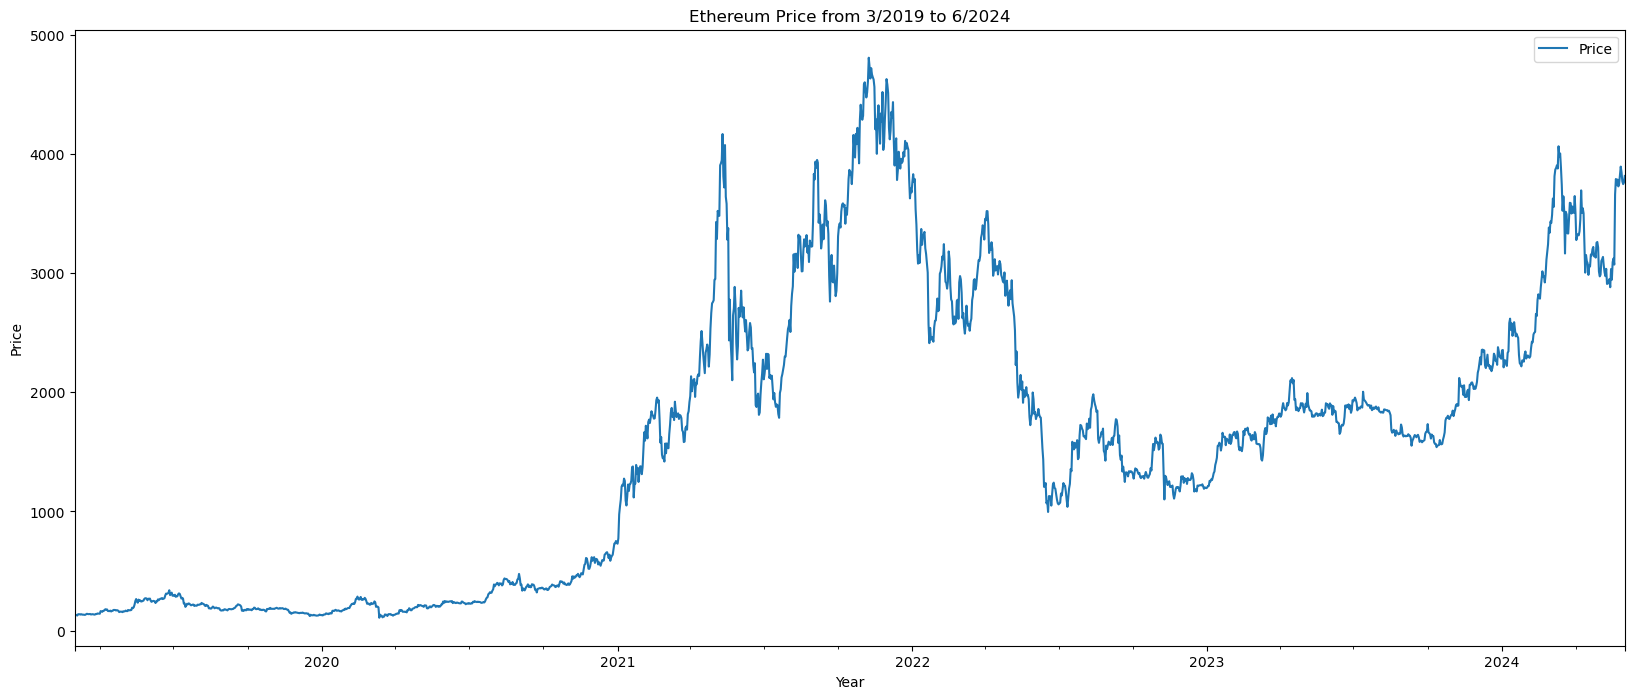

In [4]:
# Plot the Ethereum prices over time
plt.figure(figsize=(20,8))
data_eth.plot(figsize=(20,8))
plt.title('Ethereum Price from 3/2019 to 6/2024')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

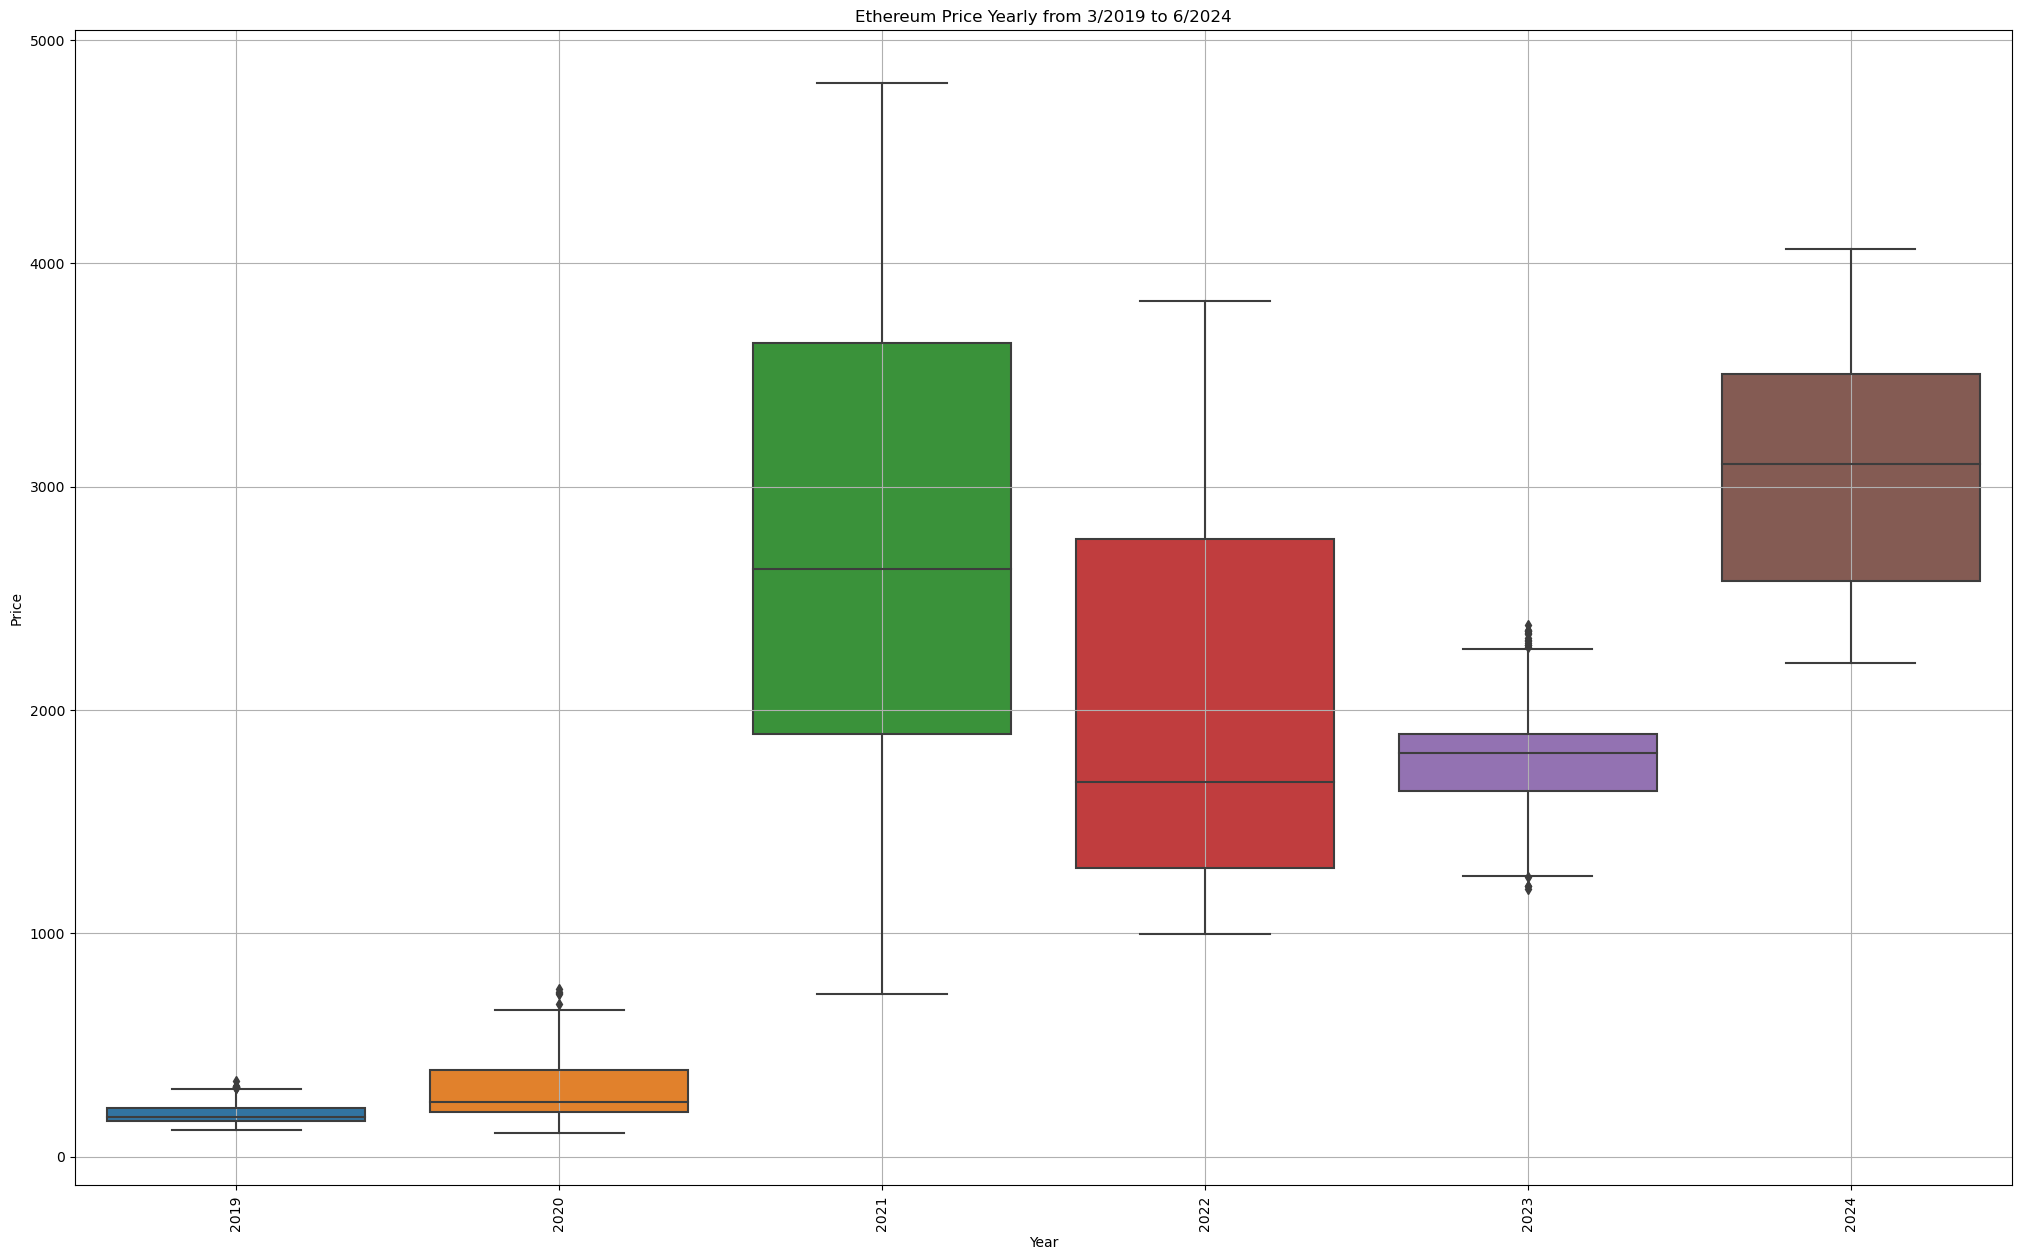

In [5]:
# Create a boxplot of the Ethereum prices by year
import seaborn as sns
plt.figure(figsize=(25,15))
sns.boxplot(x=data_eth.index.year, y=data_eth.values[:,0])
plt.title('Ethereum Price Yearly from 3/2019 to 6/2024')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [6]:
# Show summary statistics of the Ethereum prices
print("Summary statistics of Ethereum prices:\n", data_eth.describe())

Summary statistics of Ethereum prices:
              Price
count  1920.000000
mean   1580.443599
std    1205.861719
min     107.900000
25%     268.945000
50%    1622.465000
75%    2334.242500
max    4808.380000


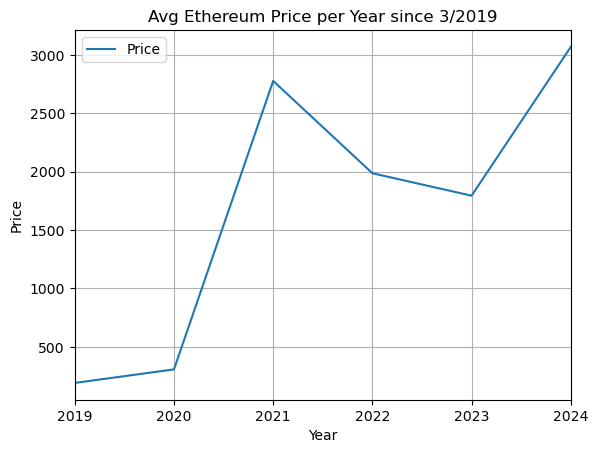

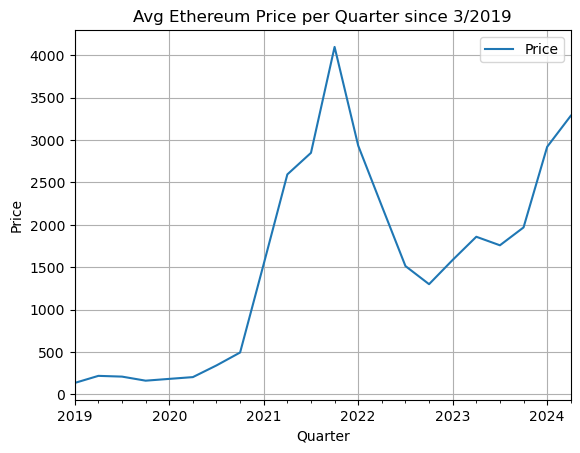

In [7]:
# Create yearly, quarterly, and decade summaries of the data
data_eth_yearly_sum = data_eth.resample('A').mean()
data_eth_yearly_sum.plot()
plt.title('Avg Ethereum Price per Year since 3/2019')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

data_eth_quarterly_sum = data_eth.resample('Q').mean()
data_eth_quarterly_sum.plot()
plt.title('Avg Ethereum Price per Quarter since 3/2019')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()


The first few rows of the coefficient of variation data:
             Mean          Std  Cov_pct
Date                                   
2019   191.466242    48.064451    25.10
2020   307.296776   144.303028    46.96
2021  2777.395151  1025.226299    36.91
2022  1986.673151   774.570612    38.99
2023  1794.645918   219.280546    12.22


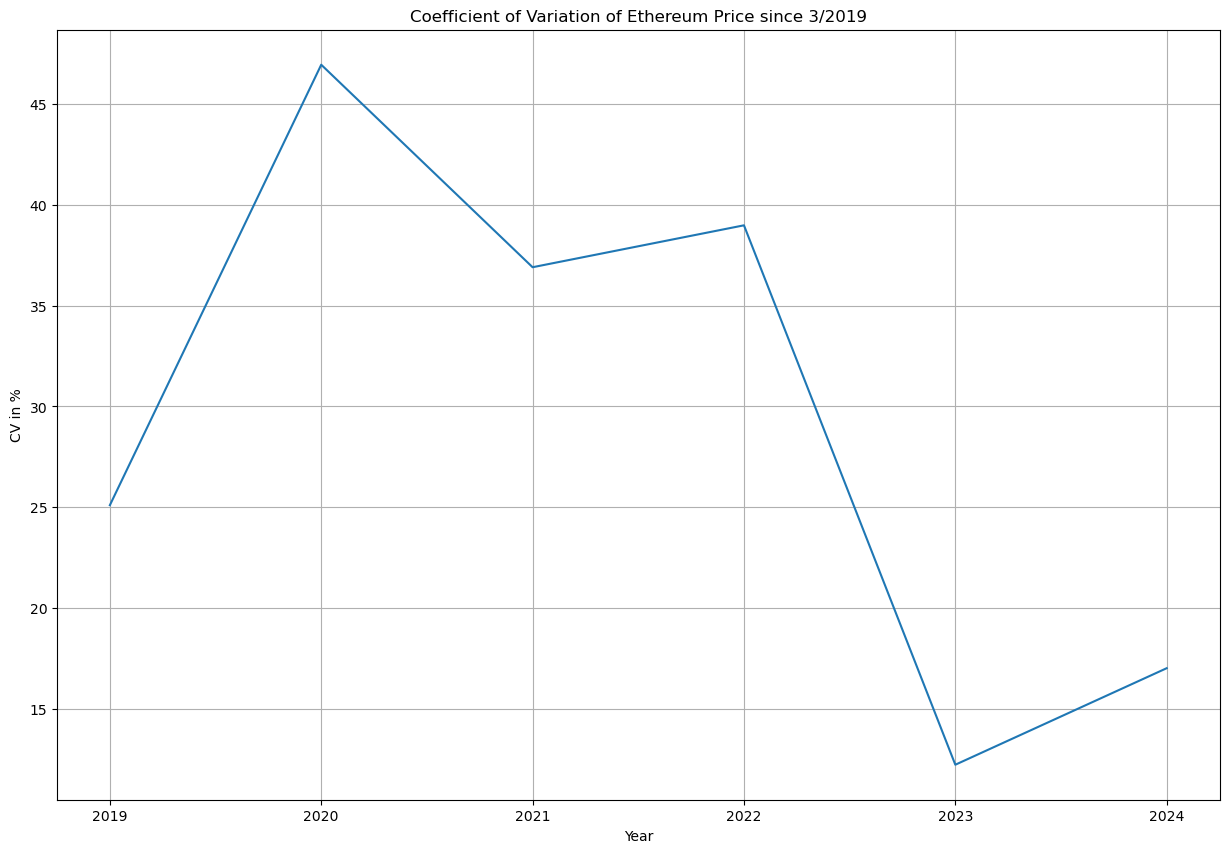

In [8]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
data_eth_1 = data_eth.groupby(data_eth.index.year).mean().rename(columns={'Price':'Mean'})
data_eth_1 = data_eth_1.merge(data_eth.groupby(data_eth.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
data_eth_1['Cov_pct'] = ((data_eth_1['Std'] / data_eth_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
data_eth_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of Ethereum Price since 3/2019')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(data_eth_1.head())